In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Id the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

In [7]:
## Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b86ed79d889c181e845cf1b8664d00bb


In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Ceate an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
        
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | yurya
City not found. Skipping...
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | avanigadda
Processing Record 5 of Set 1 | hun
Processing Record 6 of Set 1 | beloha
Processing Record 7 of Set 1 | chodavaram
Processing Record 8 of Set 1 | matara
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | rocha
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | buta
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | harper
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | bubaque
Processing Record 19 of Set 1 | vestmanna
Processing Record 20 of Set 1 | altoona
Processing Record 2

Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | saint-paul
Processing Record 41 of Set 4 | conceicao do araguaia
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | margate
Processing Record 44 of Set 4 | povenets
Processing Record 45 of Set 4 | corn island
Processing Record 46 of Set 4 | cap malheureux
Processing Record 47 of Set 4 | hithadhoo
Processing Record 48 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 49 of Set 4 | ola
Processing Record 50 of Set 4 | asyut
Processing Record 1 of Set 5 | camapua
Processing Record 2 of Set 5 | namikupa
Processing Record 3 of Set 5 | banki
Processing Record 4 of Set 5 | kot putli
City not found. Skipping...
Processing Record 5 of Set 5 | harwich
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | dinguiraye
Processing Record 8 of Set 5 | summerville
Processing Record 9 of Set 5 | baramula
Processing Record 10 of Set 5 | saint-joseph
Processing Record 11 of 

Processing Record 28 of Set 8 | acarau
Processing Record 29 of Set 8 | la roda
Processing Record 30 of Set 8 | vigrestad
Processing Record 31 of Set 8 | yacuiba
Processing Record 32 of Set 8 | marzuq
Processing Record 33 of Set 8 | zabol
Processing Record 34 of Set 8 | warqla
City not found. Skipping...
Processing Record 35 of Set 8 | guadalupe
Processing Record 36 of Set 8 | uusikaupunki
Processing Record 37 of Set 8 | havre-saint-pierre
Processing Record 38 of Set 8 | jalu
Processing Record 39 of Set 8 | mahon
Processing Record 40 of Set 8 | sioux lookout
Processing Record 41 of Set 8 | sao felix do xingu
Processing Record 42 of Set 8 | nantucket
Processing Record 43 of Set 8 | matagami
Processing Record 44 of Set 8 | havoysund
Processing Record 45 of Set 8 | madison
Processing Record 46 of Set 8 | barberton
Processing Record 47 of Set 8 | mangai
Processing Record 48 of Set 8 | hirtshals
Processing Record 49 of Set 8 | petrozavodsk
Processing Record 50 of Set 8 | lerwick
Processing R

Processing Record 16 of Set 12 | severnoye
Processing Record 17 of Set 12 | mehran
Processing Record 18 of Set 12 | iquique
Processing Record 19 of Set 12 | rizomata
Processing Record 20 of Set 12 | baghdad
Processing Record 21 of Set 12 | umm durman
City not found. Skipping...
Processing Record 22 of Set 12 | yaransk
Processing Record 23 of Set 12 | zapolyarnyy
Processing Record 24 of Set 12 | mount pleasant
Processing Record 25 of Set 12 | abha
Processing Record 26 of Set 12 | semey
Processing Record 27 of Set 12 | modakeke
Processing Record 28 of Set 12 | jacareacanga
Processing Record 29 of Set 12 | kishi
Processing Record 30 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 31 of Set 12 | tougue
Processing Record 32 of Set 12 | pisco
Processing Record 33 of Set 12 | san lorenzo
Processing Record 34 of Set 12 | prado
Processing Record 35 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 36 of Set 12 | eyl
Processing Record 37 of Set 12 | nava

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,50.92,85,96,11.14,FO,2022-06-05 17:56:41
1,Avanigadda,16.0215,80.9181,84.27,58,72,10.09,IN,2022-06-05 17:56:42
2,Hun,29.1268,15.9477,90.45,20,0,11.41,LY,2022-06-05 17:56:42
3,Beloha,-25.1667,45.0500,67.51,83,90,5.06,MG,2022-06-05 17:56:43
4,Chodavaram,17.8333,82.9500,85.84,69,95,6.53,IN,2022-06-05 17:56:43


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2022-06-05 17:56:41,62.2266,-6.5890,50.92,85,96,11.14
1,Avanigadda,IN,2022-06-05 17:56:42,16.0215,80.9181,84.27,58,72,10.09
2,Hun,LY,2022-06-05 17:56:42,29.1268,15.9477,90.45,20,0,11.41
3,Beloha,MG,2022-06-05 17:56:43,-25.1667,45.0500,67.51,83,90,5.06
4,Chodavaram,IN,2022-06-05 17:56:43,17.8333,82.9500,85.84,69,95,6.53


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

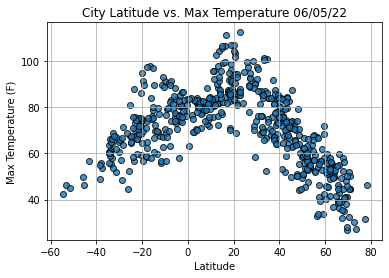

In [14]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show Plot.
plt.show()

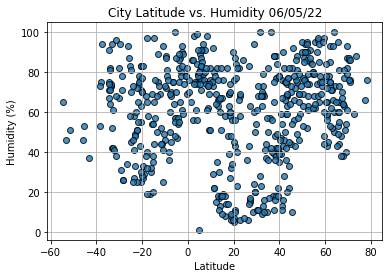

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot..
plt.show()


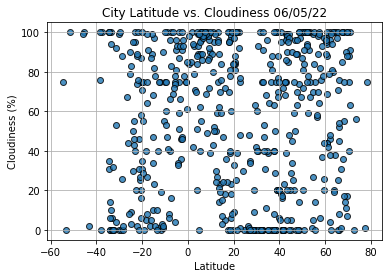

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot..
plt.show()


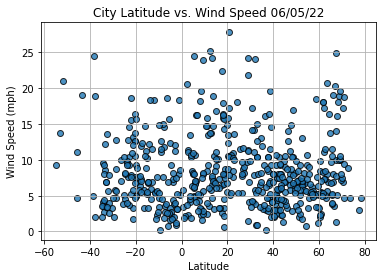

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot..
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        
        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values, y_values)
        plt.plot(x_values, regress_values, "r")
        
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel("Latitude")
        plt.ylabel(y_label)
        plt.show()



In [19]:
index13 = city_data_df.loc[13]
index13

City                      Bubaque
Country                        GW
Date          2022-06-05 17:56:46
Lat                       11.2833
Lng                      -15.8333
Max Temp                    80.51
Humidity                       80
Cloudiness                     95
Wind Speed                  14.74
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
556     True
557     True
558     True
559     True
560     True
Name: Lat, Length: 561, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2022-06-05 17:56:41,62.2266,-6.5890,50.92,85,96,11.14
1,Avanigadda,IN,2022-06-05 17:56:42,16.0215,80.9181,84.27,58,72,10.09
2,Hun,LY,2022-06-05 17:56:42,29.1268,15.9477,90.45,20,0,11.41
4,Chodavaram,IN,2022-06-05 17:56:43,17.8333,82.9500,85.84,69,95,6.53
5,Matara,LK,2022-06-05 17:56:43,5.9485,80.5353,77.56,91,86,10.65


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

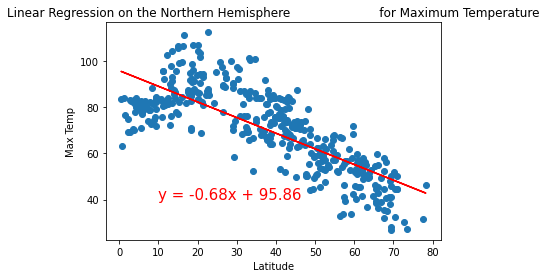

In [33]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\
                       for Maximum Temperature', 'Max Temp', (10,40))

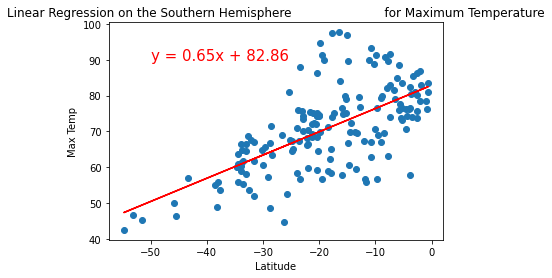

In [34]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (-50,90))

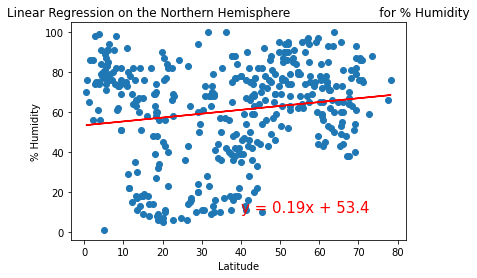

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity', (40,10))

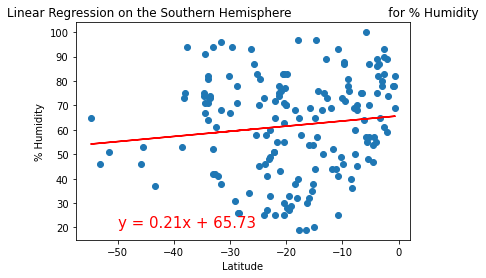

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

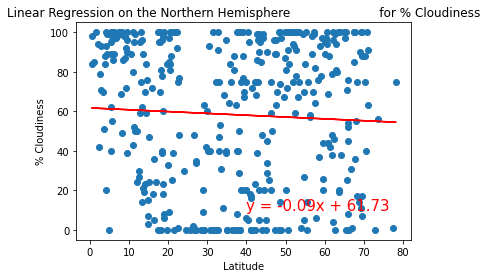

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (40,10))

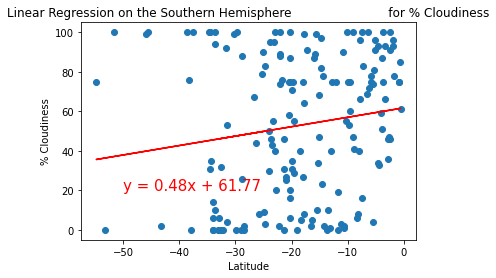

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

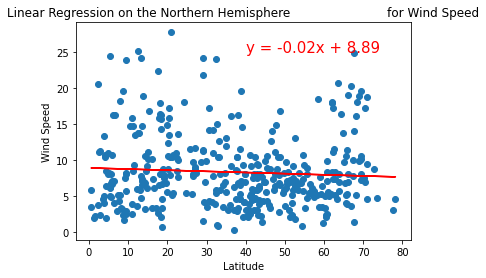

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

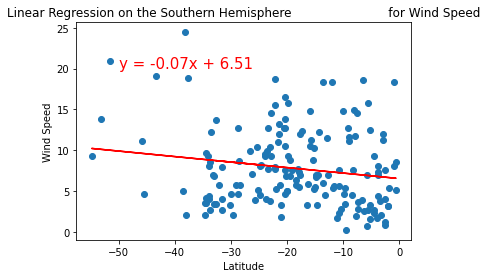

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))